In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
ppl128 = pd.read_csv('../../data/lr/gpt2_ctx128_bsz16_lr0.0001_epochs6/ppl_lr_selection.csv')
ppl512 = pd.read_csv('../../data/lr/gpt2_ctx512_bsz4_lr0.0001_epochs6/ppl_lr_selection.csv')

In [4]:
ppl128.head(3)

,Dialogue ID,Learning rate,Train ppl before,Train ppl after,Eval ppl before,Eval ppl after
0,SV2V,0.00001,162.647411,85.539330,161.943334,44.038193
1,SV2V,0.00010,162.647411,26.993965,161.943334,24.744092
2,SV2V,0.00100,162.647411,23.784752,161.943334,20.661451


In [5]:
adapt_perf, gen_perf = [], []

for _, row in ppl128.iterrows():
    adapt_perf.append((row['Train ppl after'] - row['Train ppl before']) / row['Train ppl before'] * 100)
    gen_perf.append((row['Eval ppl after'] - row['Eval ppl before']) / row['Eval ppl before'] * 100)

ppl128['Adaptation perf'] = adapt_perf
ppl128['Generalisation perf'] = gen_perf


adapt_perf_, gen_perf_ = [], []

for _, row in ppl512.iterrows():
    adapt_perf_.append((row['Train ppl after'] - row['Train ppl before']) / row['Train ppl before'] * 100)
    gen_perf_.append((row['Eval ppl after'] - row['Eval ppl before']) / row['Eval ppl before'] * 100)

ppl512['Adaptation perf'] = adapt_perf_
ppl512['Generalisation perf'] = gen_perf_


In [6]:
ppl512.head(3)

,Dialogue ID,Learning rate,Train ppl before,Train ppl after,Eval ppl before,Eval ppl after,Adaptation perf,Generalisation perf
0,SV2V,0.00001,164.837554,80.202346,164.169647,38.147943,-51.344615,-76.763096
1,SV2V,0.00010,164.837554,26.611392,164.169647,24.734956,-83.855990,-84.933295
2,SV2V,0.00100,164.837554,24.028557,164.169647,20.823593,-85.422886,-87.315808


In [7]:
mean_perf128 = ppl128.groupby('Learning rate').agg({'Adaptation perf': 'mean', 'Generalisation perf': 'mean'})
std_perf128 = ppl128.groupby('Learning rate').agg({'Adaptation perf': 'std', 'Generalisation perf': 'std'})

mean_perf512 = ppl512.groupby('Learning rate').agg({'Adaptation perf': 'mean', 'Generalisation perf': 'mean'})
std_perf512 = ppl512.groupby('Learning rate').agg({'Adaptation perf': 'std', 'Generalisation perf': 'std'})


In [16]:
mean_perf128 = mean_perf128.replace([np.inf, -np.inf], np.nan).dropna()

In [17]:
mean_perf512 = mean_perf512.replace([np.inf, -np.inf], np.nan).dropna()

In [18]:
std_perf128 = std_perf128.dropna()

In [19]:
std_perf512 = std_perf512.dropna()

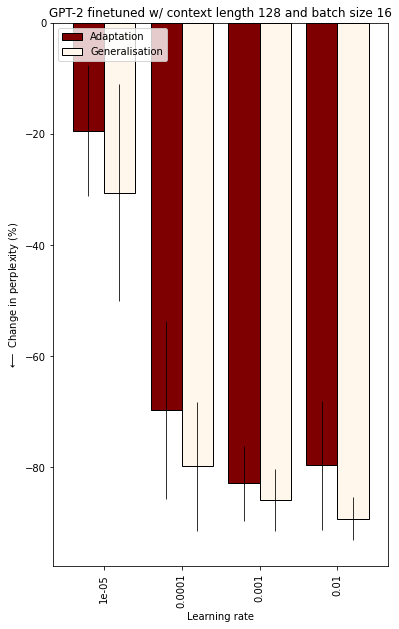

In [24]:
fig, ax = plt.subplots()
mean_perf128.plot(kind='bar', yerr=std_perf128, colormap='OrRd_r', edgecolor='black', 
               grid=False, figsize=(6,10), ax=ax, error_kw=dict(ecolor='black',elinewidth=0.8),width=0.8)
plt.ylabel('$\longleftarrow$ Change in perplexity (%)')
plt.legend(['Adaptation', 'Generalisation'], loc='upper left')
plt.title('GPT-2 finetuned w/ context length 128 and batch size 16')
plt.savefig('../../figures/gpt2-w128-bsz16-cv.pdf')

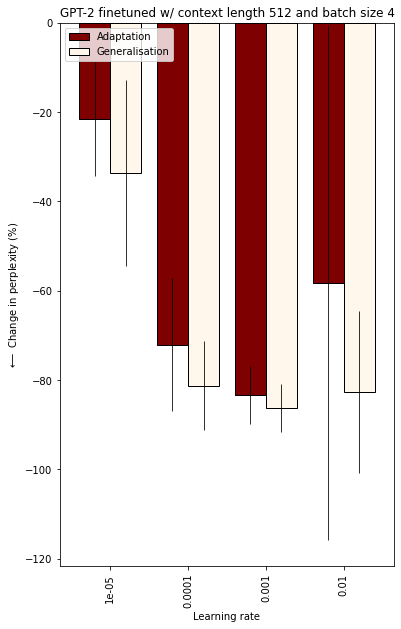

In [25]:
fig, ax = plt.subplots()
mean_perf512.plot(kind='bar', yerr=std_perf512, colormap='OrRd_r', edgecolor='black', 
               grid=False, figsize=(6,10), ax=ax, error_kw=dict(ecolor='black',elinewidth=0.8),width=0.8)
plt.ylabel('$\longleftarrow$ Change in perplexity (%)')
plt.legend(['Adaptation', 'Generalisation'], loc='upper left')
plt.title('GPT-2 finetuned w/ context length 512 and batch size 4')
plt.savefig('../../figures/gpt2-w512-bsz4-cv.pdf')